In [2]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import Markdown as md
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
def day(n):
    return datetime(2020, 2, 3) + timedelta(n)

In [3]:
rundf = pd.read_csv('results/'+
                    'SIsaR_0.9.4.2 experiments 2 seeds-table_1000_basic_control_schoolOnSept.csv',
                    sep=',',skiprows=6)
case="# 1000 epidemics with non-pharmaceutical containment measures, "+\
          "schools open in Sep"
md(case)

# 1000 epidemics with non-pharmaceutical containment measures, schools open in Sep

In [4]:
rundf["totalInfected"]=rundf["cumulativeRedCount"]+rundf["cumulativeVioletCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]

In [5]:
rundf.columns

Index(['[run number]', '[step]', 'seed0', 'seed', 'cp1cRed', 'cp1cRedNH',
       'cp1cViolet', 'cp1cVioletNH', 'cp1cDead', 'cp2cRed', 'cp2cRedNH',
       'cp2cViolet', 'cp2cVioletNH', 'cp2cDead', 'cp3cRed', 'cp3cRedNH',
       'cp3cViolet', 'cp3cVioletNH', 'cp3cDead', 'cp4cRed', 'cp4cRedNH',
       'cp4cViolet', 'cp4cVioletNH', 'cp4cDead', 'cumulativeRedCount',
       'cumulativeVioletCount', 'cumulativeDeadCount', 'ticks', 'TinfSch',
       'SinfSch', 'TinfNotSch', 'SinfNotSch', 'totalInfected',
       'totalInfected&Deceased'],
      dtype='object')

In [6]:
rundf.replace(-1, np.nan, inplace=True)

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [8]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,946.00,1000.00,1000.00,1000.00
mean,4.24,153.71,409.73,199.35
std,7.29,168.55,454.12,129.00
min,0.00,0.00,2.00,13.00
25%,0.00,9.00,18.75,95.00
50%,0.00,81.50,231.50,154.00
75%,6.00,269.50,770.00,309.25
max,42.00,738.00,1907.00,617.00


In [9]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [10]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &   ticks \\
\midrule
count &     946.00 &             1000.00 &                 1000.00 & 1000.00 \\
mean  &       4.24 &              153.71 &                  409.73 &  199.35 \\
std   &       7.29 &              168.55 &                  454.12 &  129.00 \\
min   &       0.00 &                0.00 &                    2.00 &   13.00 \\
25\%   &       0.00 &                9.00 &                   18.75 &   95.00 \\
50\%   &       0.00 &               81.50 &                  231.50 &  154.00 \\
75\%   &       6.00 &              269.50 &                  770.00 &  309.25 \\
max   &      42.00 &              738.00 &                 1907.00 &  617.00 \\
\bottomrule
\end{tabular}



The output is included within:  
\begin{table}[htbp] or [H]

... output above ...

\label{a label}  
\caption{a caption}  
\end{table}


## 1 simulation time

array([[<AxesSubplot:title={'center':'ticks'}>]], dtype=object)

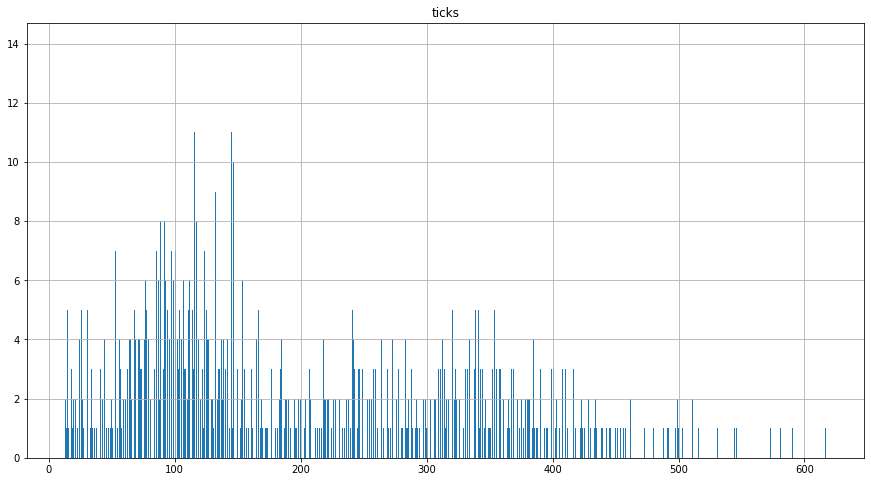

In [11]:
rundf.hist(column="ticks",bins=1000,figsize=(15,8))

## 2 symptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'cumulativeRedCount'}>]],
      dtype=object)

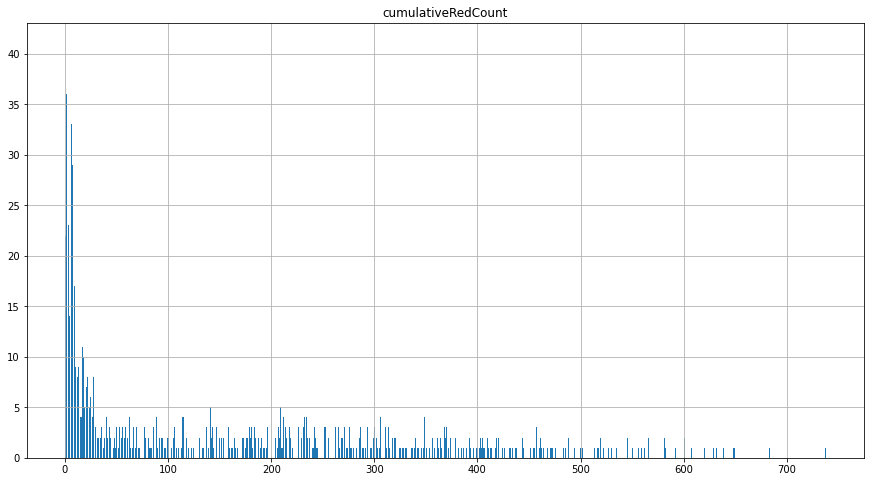

In [12]:
rundf.hist(column="cumulativeRedCount",bins=1000,figsize=(15,8))

## 3 symptomatic agent cumulative count vs. time 

<AxesSubplot:title={'center':'symptomatic agent cumulative count vs. time'}, xlabel='ticks', ylabel='cumulativeRedCount'>

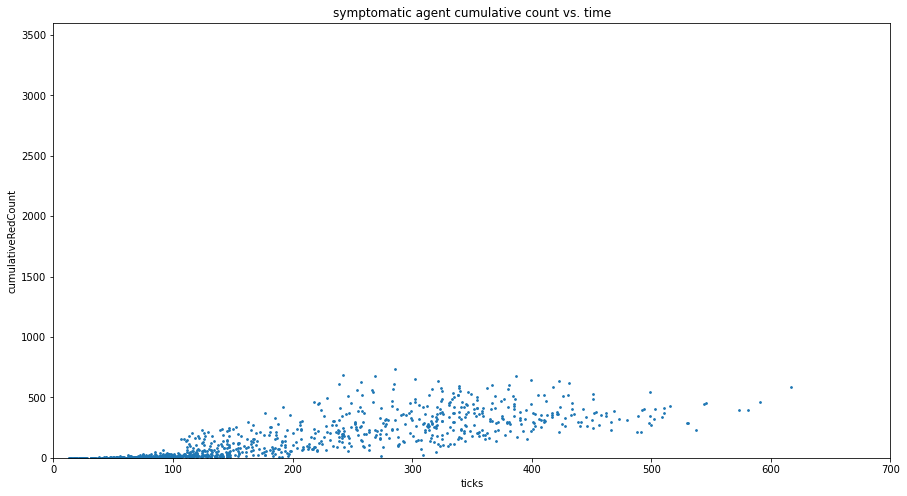

In [13]:
rundf.plot(x="ticks",y="cumulativeRedCount",s=3,kind='scatter',figsize=(15,8), 
           title="symptomatic agent cumulative count vs. time",
           ylim=(0,3600),xlim=(0,700))

## 4 symptomatic + asymptomatic agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected'}>]], dtype=object)

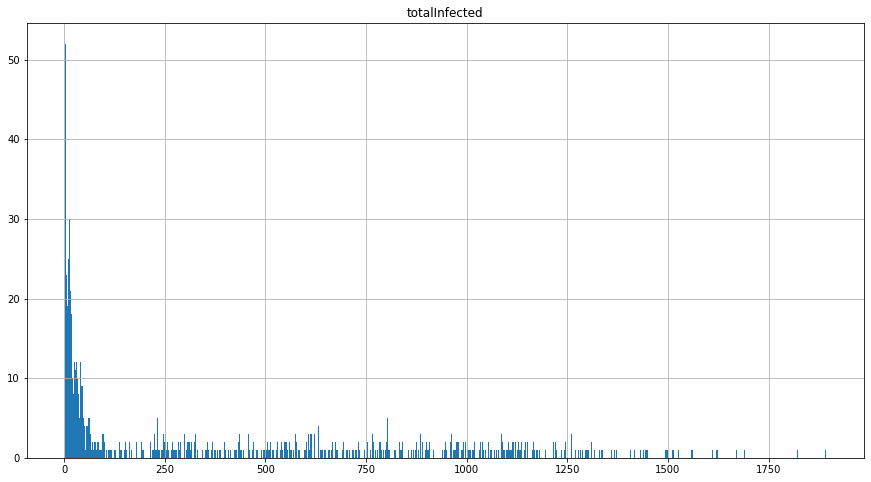

In [14]:
rundf.hist(column="totalInfected",bins=1000,figsize=(15,8))

## 5 total number of deceased

array([[<AxesSubplot:title={'center':'cumulativeDeadCount'}>]],
      dtype=object)

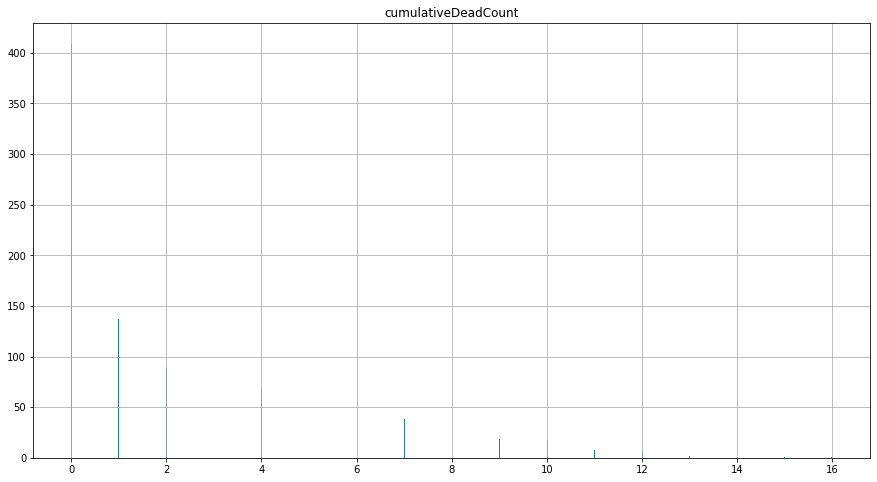

In [15]:
rundf.hist(column="cumulativeDeadCount",bins=1000,figsize=(15,8))

## 6 symptomatic + asymptomatic + deceased agent cumulative count

array([[<AxesSubplot:title={'center':'totalInfected&Deceased'}>]],
      dtype=object)

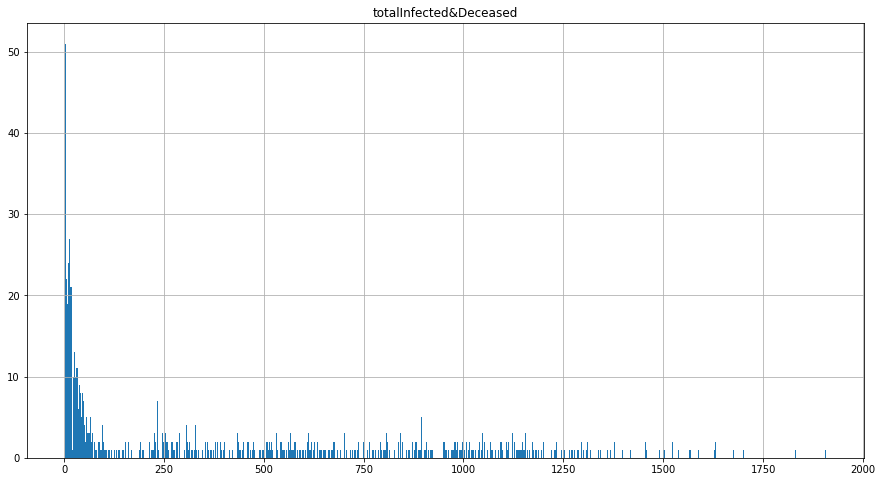

In [16]:
rundf.hist(column="totalInfected&Deceased",bins=1000,figsize=(15,8))

## 7 symptomatic + asymptomatic + deceased agent cumulative count vs. time

<AxesSubplot:title={'center':'simptomatic+asymptomatic+deceased vs. time'}, xlabel='ticks', ylabel='totalInfected&Deceased'>

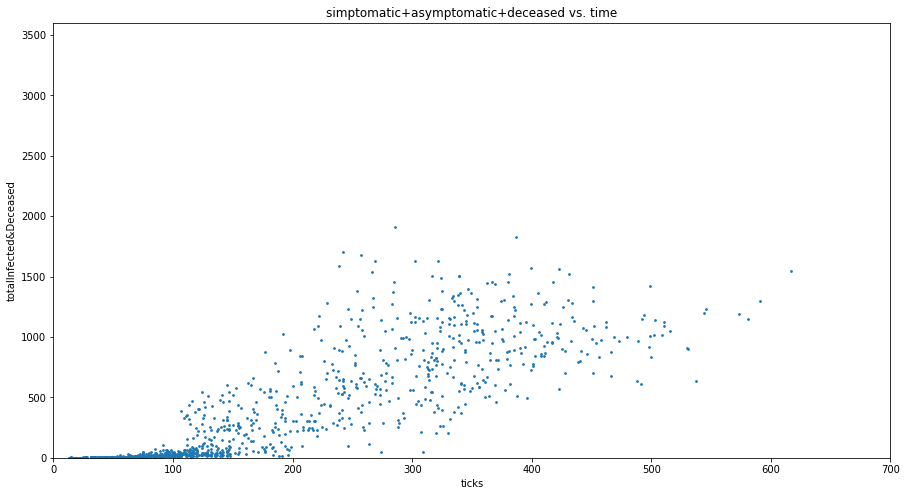

In [17]:
rundf.plot(x="ticks",y="totalInfected&Deceased",s=3,kind='scatter',figsize=(15,8), 
           title="simptomatic+asymptomatic+deceased vs. time",ylim=(0,3600),xlim=(0,700))

In [18]:
md("# --------------------------------------------------------\n"+\
    "# Time Function displaying heat-maps\n"+\
  "# --------------------------------------------------------")

# --------------------------------------------------------
# Time Function displaying heat-maps
# --------------------------------------------------------

In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

def timeFunction(day0,day1,title):
    
    rundfHere=rundf[rundf.ticks>=day0]
    rundfHere=rundfHere[rundfHere.ticks<=day1]
    
    display(md ("## Epidemics with duration between {} days ({}) and {} days ({})"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"))) )
    
    
    rundfHere.rename(columns={'cumulativeRedCount': 'symptomatic',
                              'ticks':"duration"},inplace=True)
    
    tmp=rundfHere[['symptomatic','totalInfected&Deceased','duration']].describe();
    display(tmp)
    display(print(tmp.to_latex()))
    
    for nBins in [10,20,30,60]:
        display(md ("## Epidemics with duration between {} days ({}) and {} days ({}), with {} bins"\
                   .format(day0,day(day0).strftime("%Y-%m-%d"),\
                           day1,day(day1).strftime("%Y-%m-%d"),nBins)) )
            
        rundfHere['totalInfected&Deceased'].plot.hist(bins=nBins, color="r",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()
        rundfHere['duration'].plot.hist(bins=nBins, color="g",
                                            title=title+"\ntotalInfected&Deceased");
        plt.show()

        # preparing data for the heat-map
        hist = plt.hist2d(x=rundfHere['duration'], y=rundfHere['totalInfected&Deceased'], 
                          bins=nBins, range=[[0, 700], [0, 3600]])
        plt.close() #to avoid the output of hist2d
        
        zMax=np.amax(hist[0]) # max level z axis
        display(md ("With {} bins, the max value on z axis is {}, first row {}"\
                    .format(nBins,zMax,np.transpose(hist[0])[0])))
        
        if nBins == 60: plt.figure(figsize=(20,10))
        else:           plt.figure(figsize=(8.5,4.25))
        
        lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
        ax = sns.heatmap(
            np.flip(np.transpose(hist[0]),0), 
            #robust=True, 
            norm=lognorm,
            cmap='YlGnBu',
            annot=True, fmt='.0f', 
            xticklabels=np.round(hist[1][1:],0).astype(int),
            yticklabels=np.flip(hist[2][1:],0).astype(int),
            annot_kws={"size":8}
            )

        plt.xlabel("Days")
        plt.ylabel("Total symptomatic + asymptomatic + deceased")

        plt.title(title)

        plt.show()


## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30)

,symptomatic,totalInfected&Deceased,duration
count,1000.00,1000.00,1000.00
mean,153.71,409.73,199.35
std,168.55,454.12,129.00
min,0.00,2.00,13.00
25%,9.00,18.75,95.00
50%,81.50,231.50,154.00
75%,269.50,770.00,309.25
max,738.00,1907.00,617.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &      1000.00 &                 1000.00 &   1000.00 \\
mean  &       153.71 &                  409.73 &    199.35 \\
std   &       168.55 &                  454.12 &    129.00 \\
min   &         0.00 &                    2.00 &     13.00 \\
25\%   &         9.00 &                   18.75 &     95.00 \\
50\%   &        81.50 &                  231.50 &    154.00 \\
75\%   &       269.50 &                  770.00 &    309.25 \\
max   &       738.00 &                 1907.00 &    617.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 10 bins

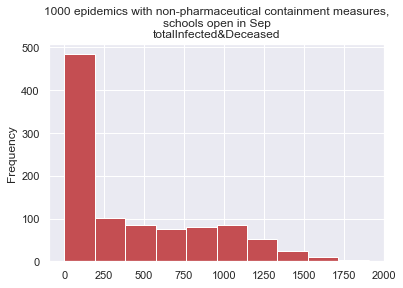

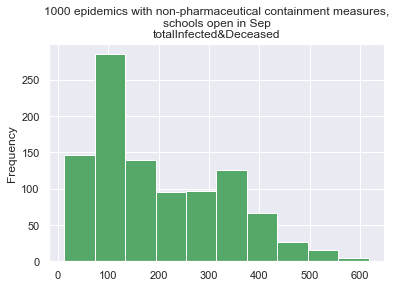

With 10 bins, the max value on z axis is 306.0, first row [131. 306. 101.  27.  11.   0.   0.   0.   0.   0.]

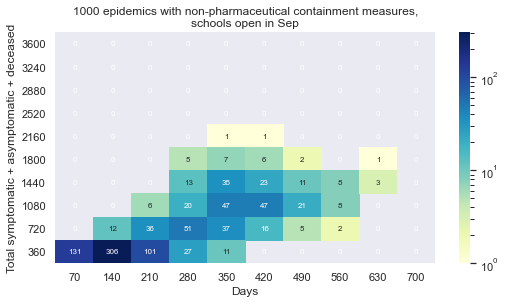

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 20 bins

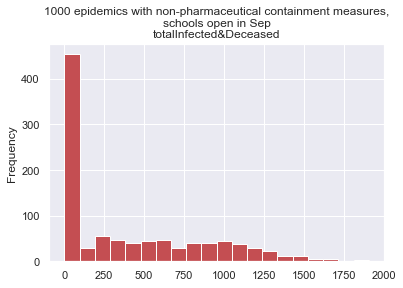

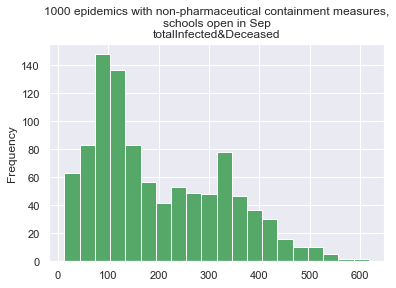

With 20 bins, the max value on z axis is 168.0, first row [ 50.  81. 168. 121.  37.  18.   0.   3.   1.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]

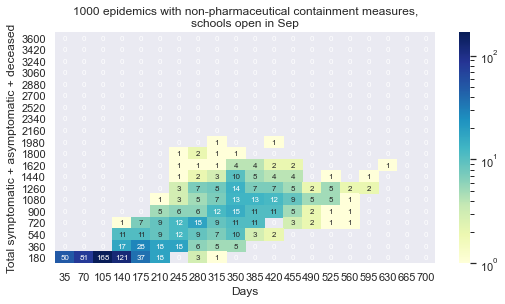

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 30 bins

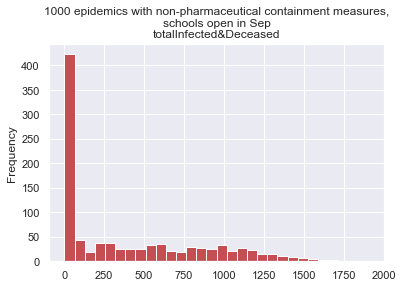

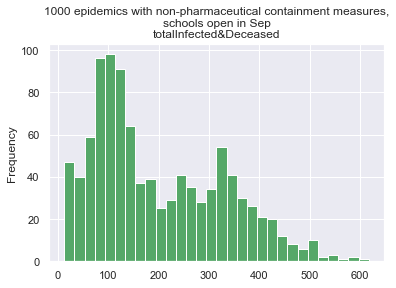

With 30 bins, the max value on z axis is 111.0, first row [ 25.  45.  61. 111. 108.  63.  28.  12.   8.   0.   1.   2.   0.   1.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]

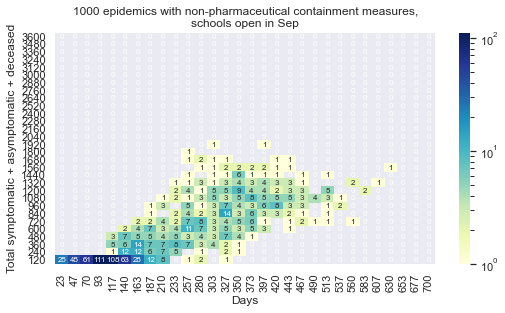

## Epidemics with duration between 0 days (2020-02-03) and 1000 days (2022-10-30), with 60 bins

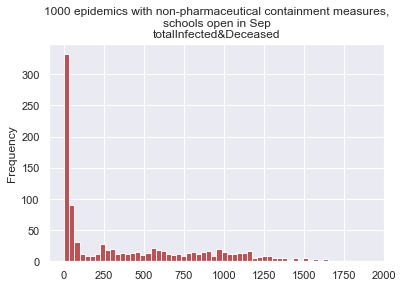

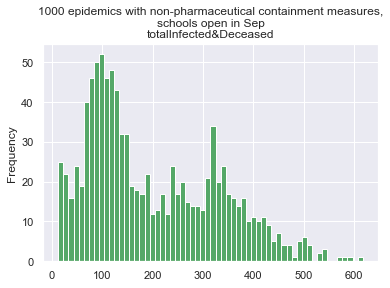

With 60 bins, the max value on z axis is 55.0, first row [ 0. 25. 25. 20. 26. 35. 55. 53. 53. 44. 28. 17. 16.  4.  1.  4.  3.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]

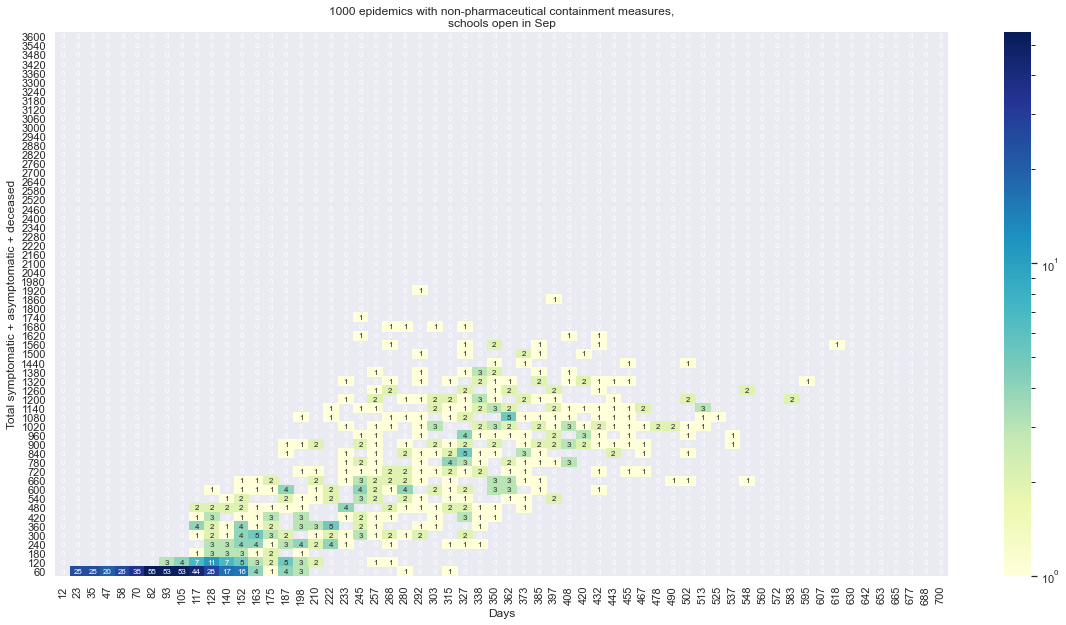

In [20]:
timeFunction(0,1000,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 1 days (2020-02-04) and 200 days (2020-08-21)

,symptomatic,totalInfected&Deceased,duration
count,580.00,580.00,580.00
mean,40.91,93.72,103.67
std,64.42,155.62,45.39
min,0.00,2.00,13.00
25%,5.00,10.00,73.00
50%,13.00,25.00,102.00
75%,44.00,77.25,135.00
max,417.00,1022.00,200.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       580.00 &                  580.00 &    580.00 \\
mean  &        40.91 &                   93.72 &    103.67 \\
std   &        64.42 &                  155.62 &     45.39 \\
min   &         0.00 &                    2.00 &     13.00 \\
25\%   &         5.00 &                   10.00 &     73.00 \\
50\%   &        13.00 &                   25.00 &    102.00 \\
75\%   &        44.00 &                   77.25 &    135.00 \\
max   &       417.00 &                 1022.00 &    200.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 1 days (2020-02-04) and 200 days (2020-08-21), with 10 bins

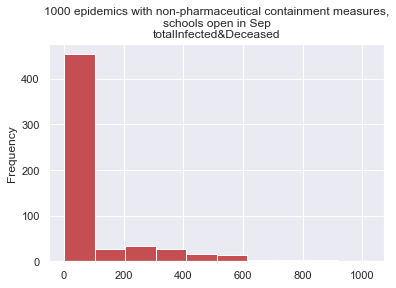

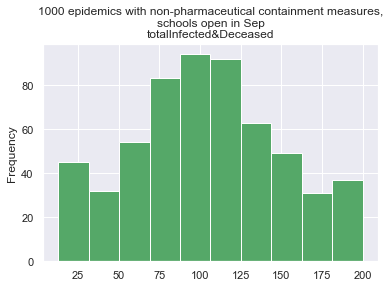

With 10 bins, the max value on z axis is 306.0, first row [131. 306.  95.   0.   0.   0.   0.   0.   0.   0.]

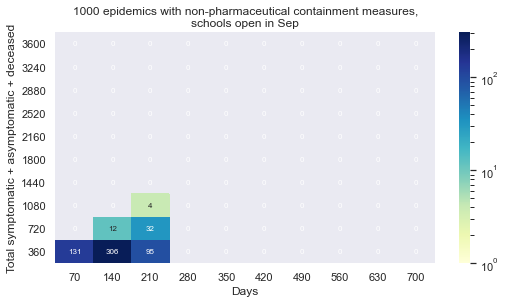

## Epidemics with duration between 1 days (2020-02-04) and 200 days (2020-08-21), with 20 bins

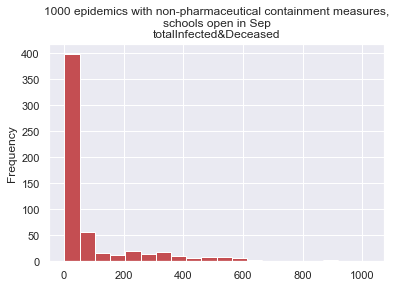

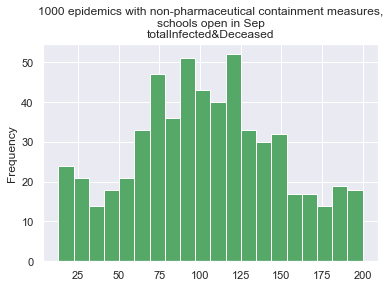

With 20 bins, the max value on z axis is 168.0, first row [ 50.  81. 168. 121.  37.  17.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.]

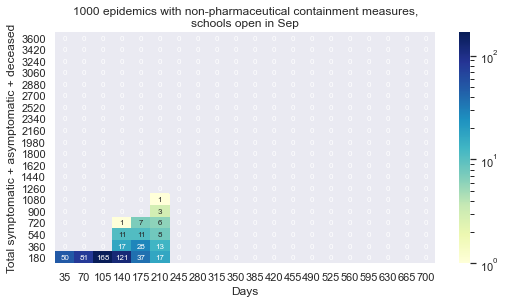

## Epidemics with duration between 1 days (2020-02-04) and 200 days (2020-08-21), with 30 bins

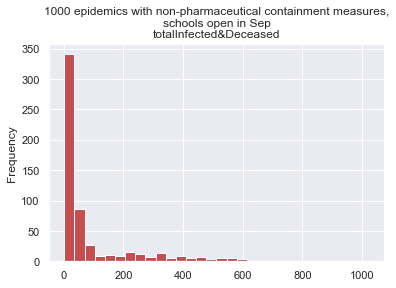

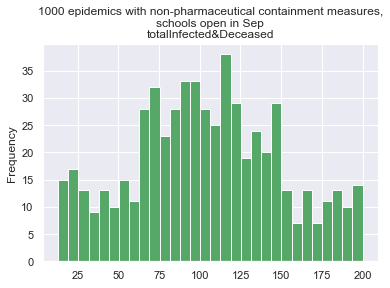

With 30 bins, the max value on z axis is 111.0, first row [ 25.  45.  61. 111. 108.  63.  28.  12.   7.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]

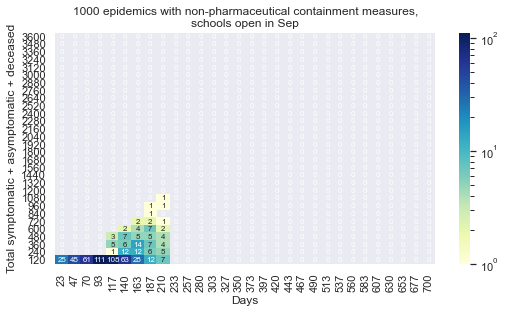

## Epidemics with duration between 1 days (2020-02-04) and 200 days (2020-08-21), with 60 bins

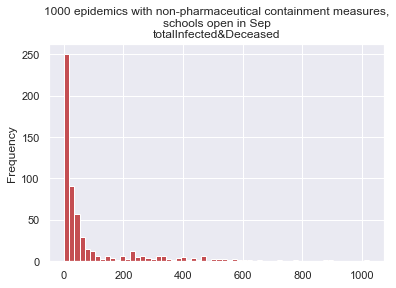

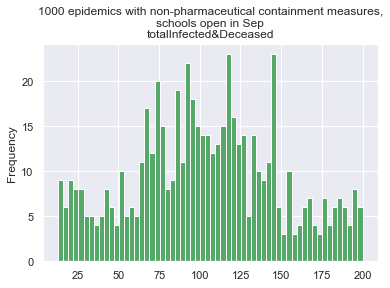

With 60 bins, the max value on z axis is 55.0, first row [ 0. 25. 25. 20. 26. 35. 55. 53. 53. 44. 28. 17. 16.  4.  1.  4.  3.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]

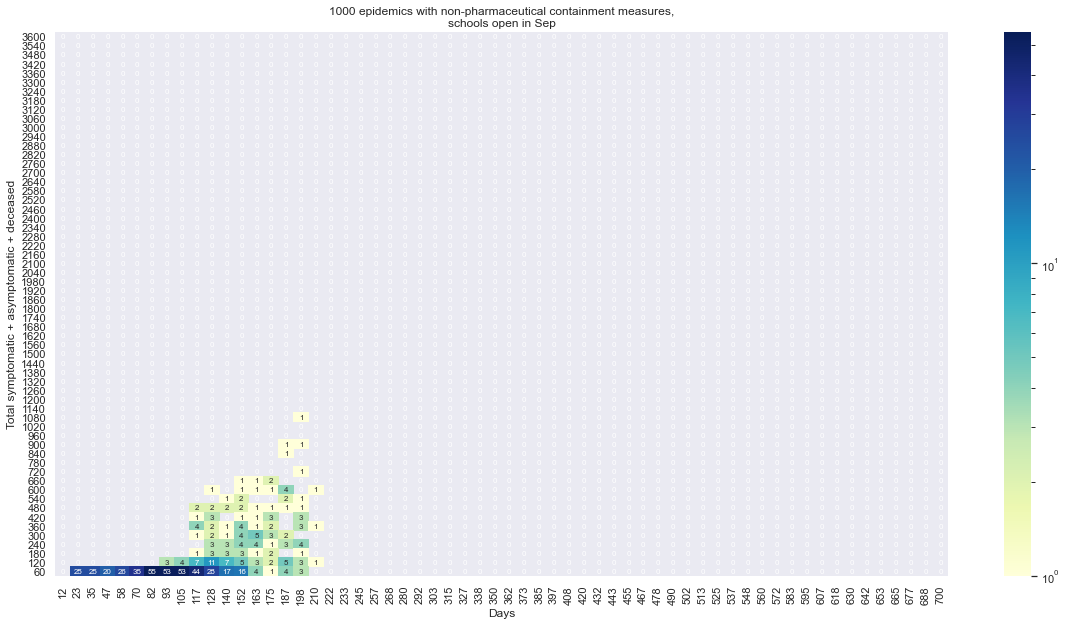

In [21]:
timeFunction(1,200,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 201 days (2020-08-22) and 350 days (2021-01-18)

,symptomatic,totalInfected&Deceased,duration
count,267.00,267.00,267.00
mean,281.92,756.38,281.92
std,149.42,377.93,43.17
min,19.00,48.00,203.00
25%,170.00,466.00,243.00
50%,261.00,702.00,283.00
75%,375.00,1037.50,321.00
max,738.00,1907.00,350.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       267.00 &                  267.00 &    267.00 \\
mean  &       281.92 &                  756.38 &    281.92 \\
std   &       149.42 &                  377.93 &     43.17 \\
min   &        19.00 &                   48.00 &    203.00 \\
25\%   &       170.00 &                  466.00 &    243.00 \\
50\%   &       261.00 &                  702.00 &    283.00 \\
75\%   &       375.00 &                 1037.50 &    321.00 \\
max   &       738.00 &                 1907.00 &    350.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 201 days (2020-08-22) and 350 days (2021-01-18), with 10 bins

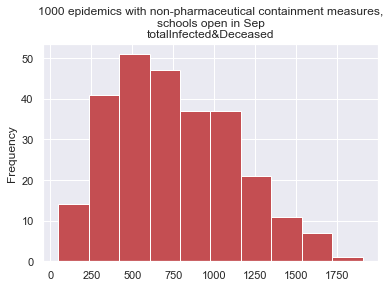

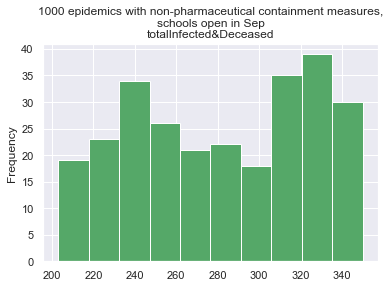

With 10 bins, the max value on z axis is 51.0, first row [ 0.  0.  6. 27. 11.  0.  0.  0.  0.  0.]

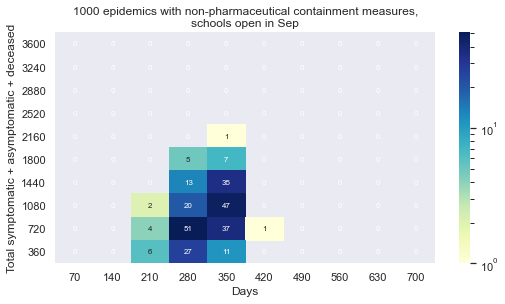

## Epidemics with duration between 201 days (2020-08-22) and 350 days (2021-01-18), with 20 bins

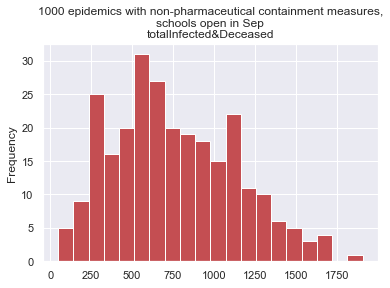

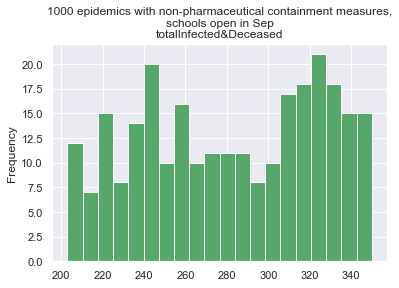

With 20 bins, the max value on z axis is 18.0, first row [0. 0. 0. 0. 0. 1. 0. 3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

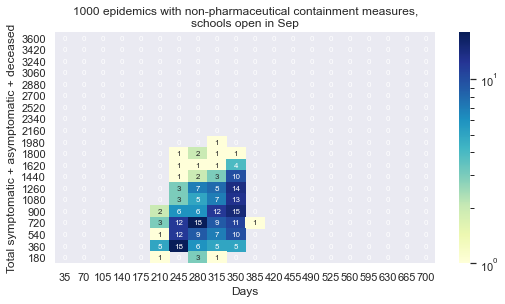

## Epidemics with duration between 201 days (2020-08-22) and 350 days (2021-01-18), with 30 bins

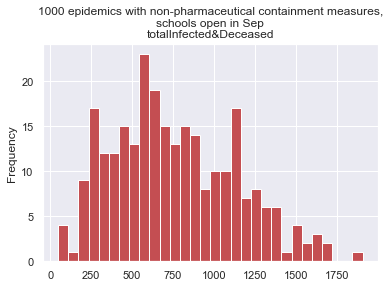

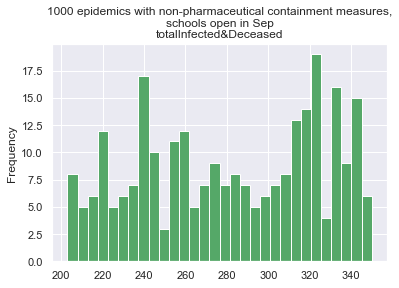

With 30 bins, the max value on z axis is 14.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 2. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

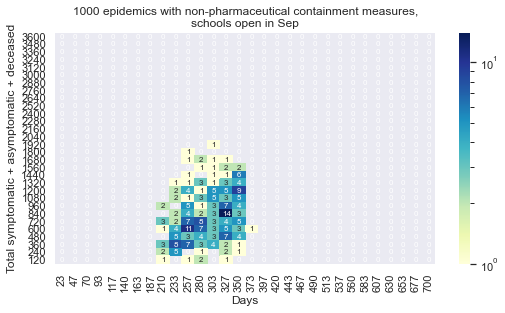

## Epidemics with duration between 201 days (2020-08-22) and 350 days (2021-01-18), with 60 bins

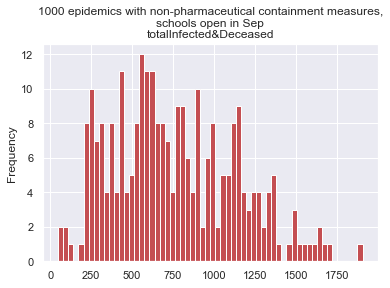

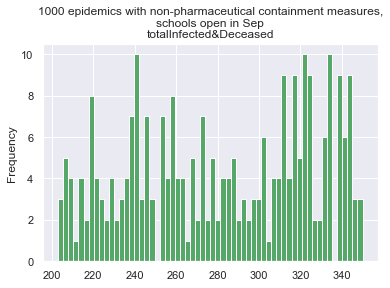

With 60 bins, the max value on z axis is 5.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

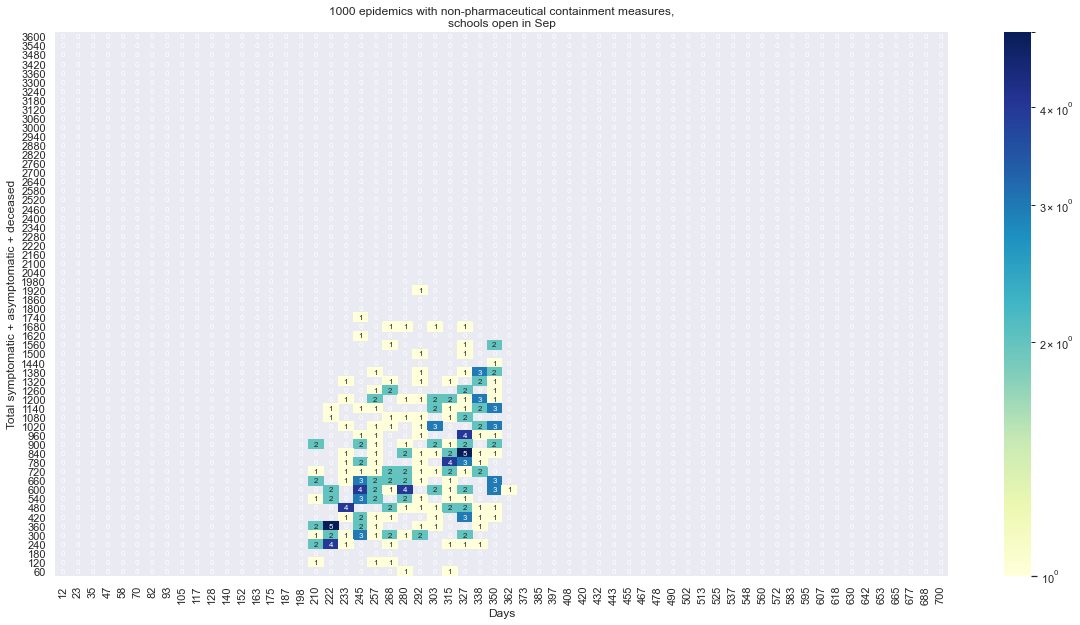

In [22]:
timeFunction(201,350,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')

## Epidemics with duration between 351 days (2021-01-19) and 1000 days (2022-10-30)

,symptomatic,totalInfected&Deceased,duration
count,153.00,153.00,153.00
mean,357.58,1002.70,417.97
std,112.17,259.10,56.95
min,141.00,460.00,351.00
25%,287.00,844.00,374.00
50%,349.00,995.00,403.00
75%,412.00,1148.00,450.00
max,681.00,1831.00,617.00


\begin{tabular}{lrrr}
\toprule
{} &  symptomatic &  totalInfected\&Deceased &  duration \\
\midrule
count &       153.00 &                  153.00 &    153.00 \\
mean  &       357.58 &                 1002.70 &    417.97 \\
std   &       112.17 &                  259.10 &     56.95 \\
min   &       141.00 &                  460.00 &    351.00 \\
25\%   &       287.00 &                  844.00 &    374.00 \\
50\%   &       349.00 &                  995.00 &    403.00 \\
75\%   &       412.00 &                 1148.00 &    450.00 \\
max   &       681.00 &                 1831.00 &    617.00 \\
\bottomrule
\end{tabular}



None

## Epidemics with duration between 351 days (2021-01-19) and 1000 days (2022-10-30), with 10 bins

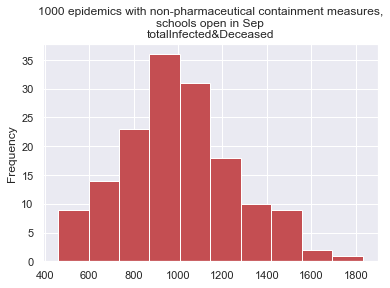

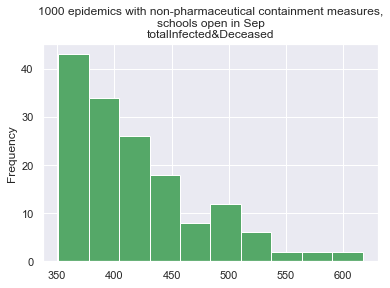

With 10 bins, the max value on z axis is 47.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

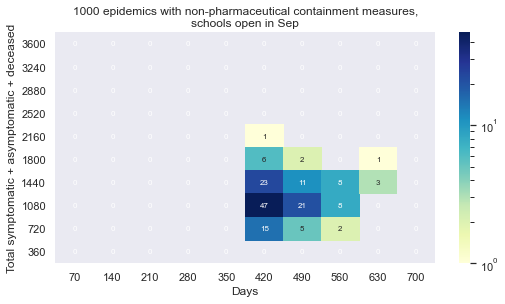

## Epidemics with duration between 351 days (2021-01-19) and 1000 days (2022-10-30), with 20 bins

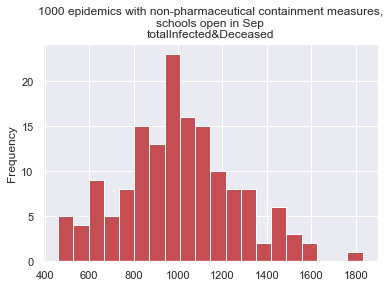

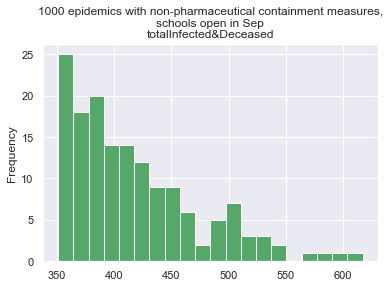

With 20 bins, the max value on z axis is 13.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

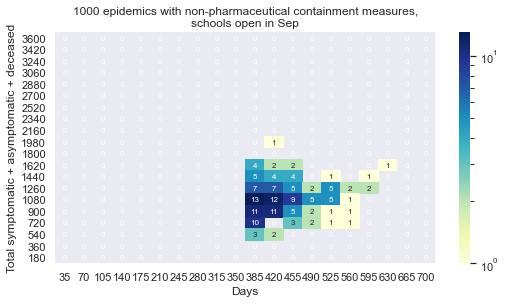

## Epidemics with duration between 351 days (2021-01-19) and 1000 days (2022-10-30), with 30 bins

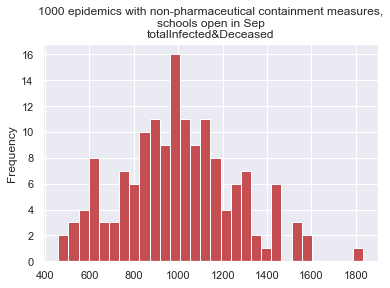

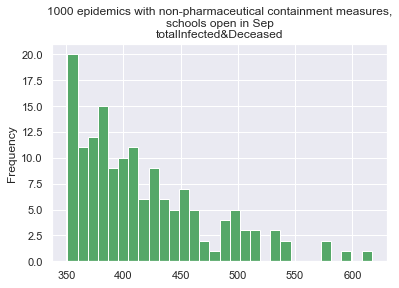

With 30 bins, the max value on z axis is 8.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]

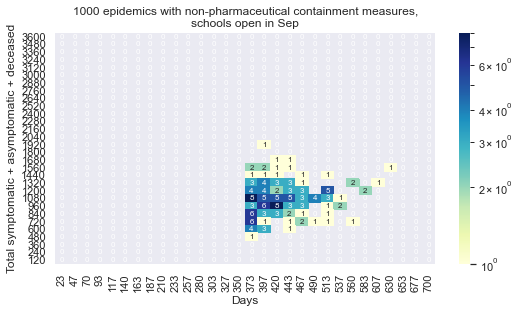

## Epidemics with duration between 351 days (2021-01-19) and 1000 days (2022-10-30), with 60 bins

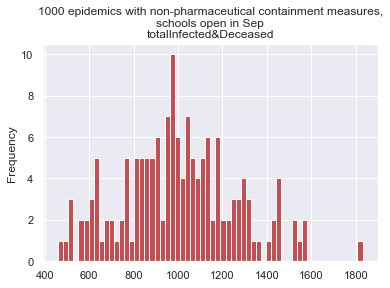

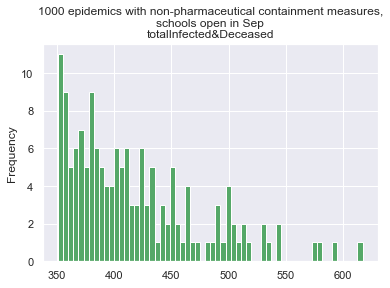

With 60 bins, the max value on z axis is 5.0, first row [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

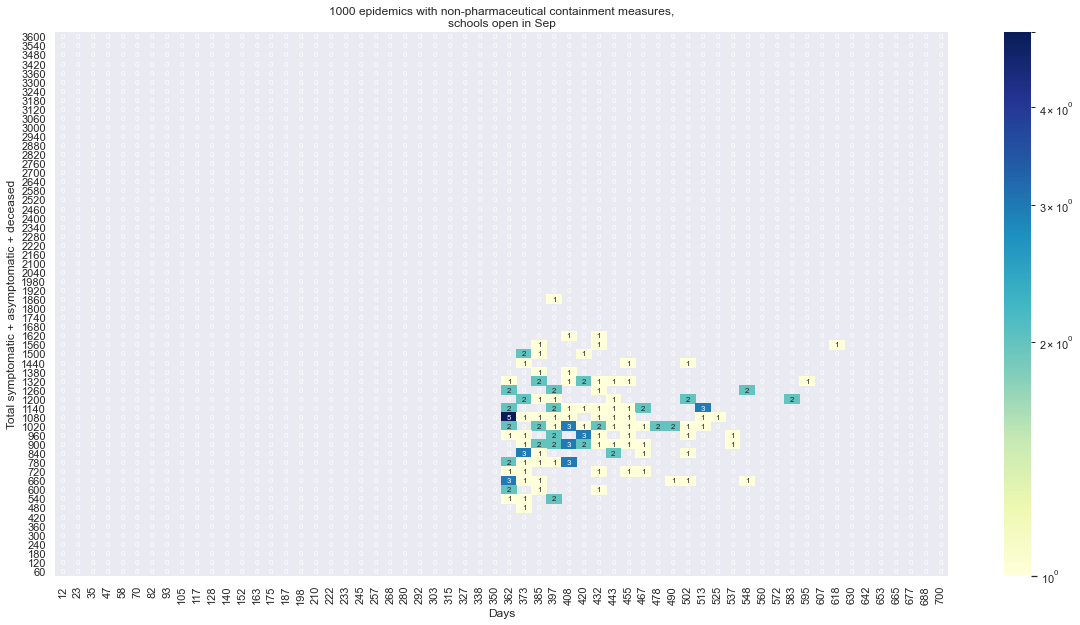

In [23]:
timeFunction(351,1000,'1000 epidemics with non-pharmaceutical containment measures,\n'+
          'schools open in Sep')